# Problem 2.

In this homework you need to implement some of the models that we have seen, and measure experimentally some of the graph properties. Of course, each model has its own parameters.

## Installing additional libraries

In [1]:
!pip install networkx scipy matplotlib tqdm pandas

## Importing the needed libraries

In [2]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm.notebook import tqdm
from scipy import stats
from networkx.algorithms.approximation import diameter, average_clustering

## Implementing the two types of graph model.

In [3]:
def ER_graph(n, p):
    '''Create and initialize a graph following the Erdos Renyi Graph Model
    
    Parameters:
    - n: number of nodes
    - p: a value between 0 and 1, it rappresents the probability for which an edge exists
    '''
    # Create a graph
    g = nx.Graph()
    
    # Adding all the nodes to the graph g
    g.add_nodes_from(list(range(1, n+1)))
    
    # Adding random edges using as probability p
    for i in tqdm(range(1, n+1)):
        for j in range(i+1, n+1):
            if random.uniform(0, 1) <= p: g.add_edge(i, j)
    
    return g        
                
def PA_graph(n, l):
    '''Create and initialize a graph following the Barabasi Albert Graph Model
    
    Parameters:
    - n: number of nodes
    - l: number of neighbors that a newly arrived node comes with.
    '''
    if l < 1 or l >= n:
        raise nx.NetworkXError("A PA model must have l>=1 and l < n")
    
    # Create a graph
    g = nx.Graph()
    
    # Adding the first l nodes to the graph g
    g.add_nodes_from(list(range(1, l+1)))
    
    for i in tqdm(range(1, n+1)):
        
        if i <= l:
            for j in range(i+1, l+1):
                # Connect the first l nodes between them self
                g.add_edge(i, j)
        else:
            degrees = np.array(list(dict(g.degree()).values()))
        
            probabilities = degrees / sum(degrees)
        
            nodes = np.array(list(g.nodes()))
        
            # we add the new node to the graph
            g.add_node(i)
        
            distr = stats.rv_discrete(name='custm', values=(nodes, probabilities))
            new_edges = list(set(distr.rvs(size = l)))
        
            # we add an edge of the type (i, elem)
            for elem in new_edges:
                g.add_edge(i, elem)

    return g

## Running different parameters' combinations

In [4]:
# Vectors of this type: [[graph_0, parameter_0],[graph_1, parameter_1],...,[graph_k, parameter_k]]
ER = []
PA = []

# A simulation consist in creating two graph (one of ER type and the other of PA),
# with a possible combination of (n, parameter)
simulations = 4

# Parameters:
n = [20000, 50000, 20000, 50000]
p = [0.001, 0.0008, 0.01, 0.001]
l = [50, 2, 100, 100]

# Simulation
print("--- Starting Simulations ---")
print()
start = time.time()

print()
print("- Erdos Renyi models -")
for sim in range(simulations):

    print("Simulation "+str(sim+1)+":")
    # Creating a Erdos Renyi graph with that (n,p) combination and appending it to ER
    ER.append(ER_graph(n[sim], p[sim]))

print()
print("- Barabasi Albert models -")
for sim in range(simulations):
    
    print("Simulation "+str(sim+1)+":")
    # Creating a Barabasi Albert graph with that (n,l) combination and appending it to PA
    PA.append(PA_graph(n[sim], l[sim]))
    
end = time.time()
print()
print("--- Execution time: " + str(int((end-start)/60)) + " min and " + str((end-start)%60) + " seconds ---")

--- Starting Simulations ---


- Erdos Renyi models -
Simulation 1:


  0%|          | 0/20000 [00:00<?, ?it/s]

Simulation 2:


  0%|          | 0/50000 [00:00<?, ?it/s]

Simulation 3:


  0%|          | 0/20000 [00:00<?, ?it/s]

Simulation 4:


  0%|          | 0/50000 [00:00<?, ?it/s]


- Barabasi Albert models -
Simulation 1:


  0%|          | 0/20000 [00:00<?, ?it/s]

Simulation 2:


  0%|          | 0/50000 [00:00<?, ?it/s]

Simulation 3:


  0%|          | 0/20000 [00:00<?, ?it/s]

Simulation 4:


  0%|          | 0/50000 [00:00<?, ?it/s]


--- Execution time: 97 min and 0.3159358501434326 seconds ---


In [5]:
ER_diameter = []
PA_diameter = []

ER_avg_clustering = []
PA_avg_clustering = []

# Requested attributes:
print("--- Starting Evaluations ---")
print()
start = time.time()

print()
print("Calculating diameter and clustering coefficient for Erdos Renyi models")
for sim in tqdm(range(simulations)):
    ER_avg_clustering.append(average_clustering(ER[sim], 1000000))
    ER_diameter.append(diameter(ER[sim]))

print()
print("Calculating diameter and clustering coefficient for Barabsi Albert models")
for sim in tqdm(range(simulations)):
    PA_avg_clustering.append(average_clustering(PA[sim], 1000000))
    PA_diameter.append(diameter(PA[sim]))
    
end = time.time()
print()
print("--- Execution time: " + str(int((end-start)/60)) + " min and " + str((end-start)%60) + " seconds ---")

--- Starting Evaluations ---


Calculating diameter and clustering coefficient for Erdos Renyi models


  0%|          | 0/4 [00:00<?, ?it/s]


Calculating diameter and clustering coefficient for Barabsi Albert models


  0%|          | 0/4 [00:00<?, ?it/s]


--- Execution time: 2 min and 10.95206332206726 seconds ---


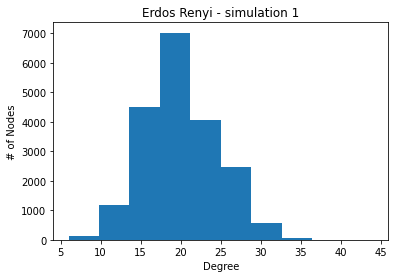

Nodes: 20000
Edges: 200257
Diameter: 5
p: 0.001
Avg Clustering Coefficient: 0.000941

---------------------------------------------


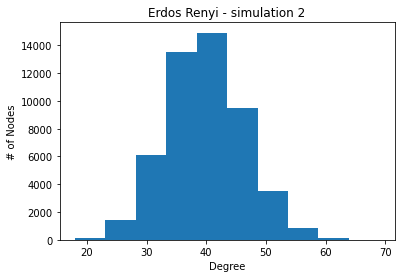

Nodes: 50000
Edges: 998235
Diameter: 4
p: 0.0008
Avg Clustering Coefficient: 0.000787

---------------------------------------------


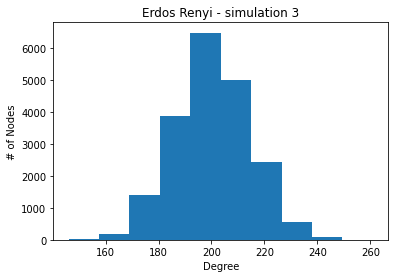

Nodes: 20000
Edges: 2001032
Diameter: 3
p: 0.01
Avg Clustering Coefficient: 0.01018

---------------------------------------------


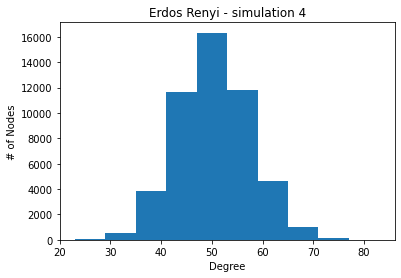

Nodes: 50000
Edges: 1249167
Diameter: 4
p: 0.001
Avg Clustering Coefficient: 0.001047

---------------------------------------------


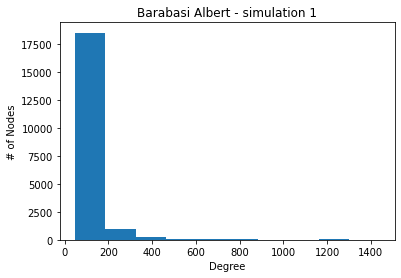

Nodes: 20000
Edges: 988624
l: 50
Diameter: 5
Avg Clustering Coefficient: 0.000941

---------------------------------------------


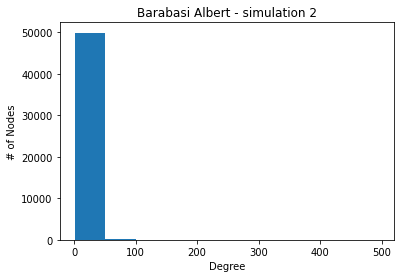

Nodes: 50000
Edges: 99973
l: 2
Diameter: 4
Avg Clustering Coefficient: 0.000787

---------------------------------------------


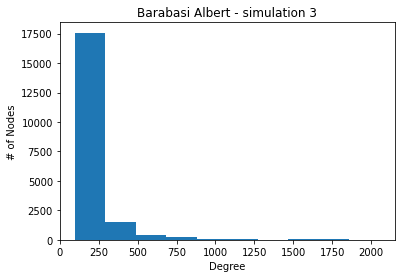

Nodes: 20000
Edges: 1961779
l: 100
Diameter: 3
Avg Clustering Coefficient: 0.01018

---------------------------------------------


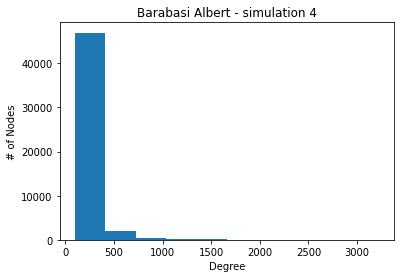

Nodes: 50000
Edges: 4953170
l: 100
Diameter: 4
Avg Clustering Coefficient: 0.001047

---------------------------------------------

				 --- Results table ---

           type simulation   edges nodes probability   l diameter  avg-clustering-coefficient
    Erdos Renyi          0  200257 20000       0.001   -        5                    0.000941
    Erdos Renyi          1  998235 50000      0.0008   -        4                    0.000787
    Erdos Renyi          2 2001032 20000        0.01   -        3                    0.010180
    Erdos Renyi          3 1249167 50000       0.001   -        4                    0.001047
Barabasi Albert          0  988624 20000           -  50        3                    0.019717
Barabasi Albert          1   99973 50000           -   2        9                    0.001188
Barabasi Albert          2 1961779 20000           - 100        3                    0.032798
Barabasi Albert          3 4953170 50000           - 100        3                    0.0

In [6]:
results = pd.DataFrame(columns = ['type', 'simulation', 'edges', 'nodes', 'probability', 'l', 'diameter', 'avg-clustering-coefficient'])

for sim in range(simulations):
    
    results = pd.concat([results, pd.DataFrame(
        [["Erdos Renyi", sim, ER[sim].number_of_edges(), ER[sim].number_of_nodes(), p[sim], "-", ER_diameter[sim], ER_avg_clustering[sim]]],
        columns = ['type', 'simulation','edges', 'nodes', 'probability', 'l', 'diameter', 'avg-clustering-coefficient'])])
    
    plt.hist(list(dict(ER[sim].degree()).values()))
    plt.title("Erdos Renyi - simulation "+str(sim+1))
    plt.xlabel('Degree')
    plt.ylabel('# of Nodes')
    plt.show()
    
    print("Nodes:", ER[sim].number_of_nodes())
    print("Edges:", ER[sim].number_of_edges())
    print("Diameter:", ER_diameter[sim])
    print("p:", p[sim])
    print("Avg Clustering Coefficient:", ER_avg_clustering[sim])
    print()
    print("---------------------------------------------")
    
for sim in range(simulations):
    
    results = pd.concat([results, pd.DataFrame(
        [["Barabasi Albert", sim, PA[sim].number_of_edges(), PA[sim].number_of_nodes(), "-", l[sim], PA_diameter[sim], PA_avg_clustering[sim]]],
        columns = ['type', 'simulation', 'edges', 'nodes', 'probability', 'l', 'diameter', 'avg-clustering-coefficient'])])
    
    plt.hist(list(dict(PA[sim].degree()).values()))
    plt.title("Barabasi Albert - simulation "+str(sim+1))
    plt.xlabel('Degree')
    plt.ylabel('# of Nodes')
    plt.show()
    
    print("Nodes:", PA[sim].number_of_nodes())
    print("Edges:", PA[sim].number_of_edges())
    print("l:", l[sim])
    print("Diameter:", ER_diameter[sim])
    print("Avg Clustering Coefficient:", ER_avg_clustering[sim])
    print()
    print("---------------------------------------------")

print()
print("\t\t\t\t --- Results table ---")
print()
print(results.to_string(index=False))
print()

## Loading some graph from the SNAP library: https://snap.stanford.edu/data/

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
print("--- Starting Evaluations ---")
print()
start = time.time()

PATH = "gdrive/MyDrive/hw1-social-network/" # path to the files

snap_graphs = {}

facebook_combined = nx.read_edgelist(PATH+"facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
snap_graphs["facebook_combined"] = [facebook_combined, diameter(facebook_combined), average_clustering(facebook_combined, 1000000)]

df = pd.read_csv(PATH+"musae_facebook_edges.csv", sep = ",")
musae_facebook = nx.from_pandas_edgelist(df, source = "id_1", target = "id_2", create_using = nx.Graph())
snap_graphs["musae_facebook"] = [musae_facebook, diameter(musae_facebook), average_clustering(musae_facebook, 1000000)]

df = pd.read_csv(PATH+"deezer_europe_edges.csv", sep = ",")
deezer_europe = nx.from_pandas_edgelist(df, source = "node_1", target = "node_2", create_using = nx.Graph())
snap_graphs["deezer_europe"] = [deezer_europe, diameter(deezer_europe), average_clustering(deezer_europe, 1000000)]

df = pd.read_csv(PATH+"artist_edges.csv", sep = ",")
facebook_artist = nx.from_pandas_edgelist(df, source = "node_1", target = "node_2", create_using = nx.Graph())
snap_graphs["facebook_artist"] = [facebook_artist, diameter(facebook_artist), average_clustering(facebook_artist, 1000000)]

end = time.time()
print()
print("--- Execution time: " + str(int((end-start)/60)) + " min and " + str((end-start)%60) + " seconds ---")

--- Starting Evaluations ---


--- Execution time: 0 min and 48.63357377052307 seconds ---


## Comparing these results with the previous ones

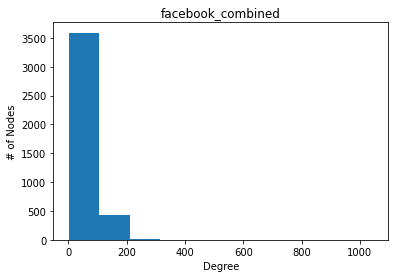

Number of nodes: 4039
Number of edges: 88234
Diameter: 8
Avg Clustering: 0.60517

---------------------------------------------


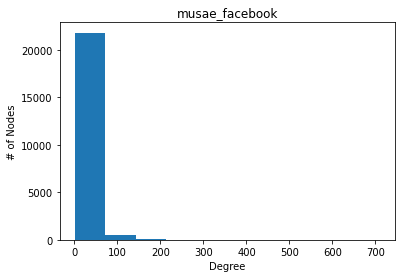

Number of nodes: 22470
Number of edges: 171002
Diameter: 15
Avg Clustering: 0.36201

---------------------------------------------


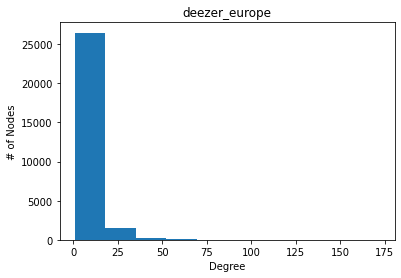

Number of nodes: 28281
Number of edges: 92752
Diameter: 21
Avg Clustering: 0.141664

---------------------------------------------


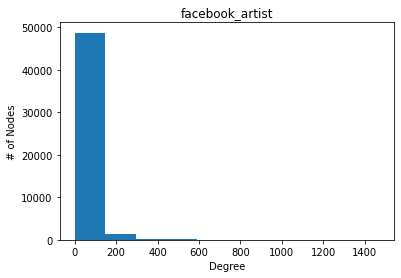

Number of nodes: 50515
Number of edges: 819306
Diameter: 11
Avg Clustering: 0.139622

---------------------------------------------

				 --- Comparing Results table ---

             type simulation   edges nodes probability   l diameter  avg-clustering-coefficient
      Erdos Renyi          0  200257 20000       0.001   -        5                    0.000941
      Erdos Renyi          1  998235 50000      0.0008   -        4                    0.000787
      Erdos Renyi          2 2001032 20000        0.01   -        3                    0.010180
      Erdos Renyi          3 1249167 50000       0.001   -        4                    0.001047
  Barabasi Albert          0  988624 20000           -  50        3                    0.019717
  Barabasi Albert          1   99973 50000           -   2        9                    0.001188
  Barabasi Albert          2 1961779 20000           - 100        3                    0.032798
  Barabasi Albert          3 4953170 50000           - 100   

In [9]:
compare_results = results

for g in snap_graphs:
    
    compare_results = pd.concat([compare_results, pd.DataFrame(
        [[g, "-", snap_graphs[g][0].number_of_edges(), snap_graphs[g][0].number_of_nodes(), "-", "-", snap_graphs[g][1], snap_graphs[g][2]]],
        columns = ['type', 'simulation', 'edges', 'nodes', 'probability', 'l', 'diameter', 'avg-clustering-coefficient'])])
  
    
    plt.hist(list(dict(snap_graphs[g][0].degree()).values()))
    plt.title(g)
    plt.xlabel('Degree')
    plt.ylabel('# of Nodes')
    plt.show()

    print("Number of nodes:", snap_graphs[g][0].number_of_nodes())
    print("Number of edges:", snap_graphs[g][0].number_of_edges())
    print("Diameter:", snap_graphs[g][1])
    print("Avg Clustering:", snap_graphs[g][2])
    print()
    print("---------------------------------------------")

print()
print("\t\t\t\t --- Comparing Results table ---")
print()
print(compare_results.to_string(index = False))

By comparing the outputs of our Erdos-Reyi's and Barabasi-Albert's implementations with those of the real networks we can see that the diameter we obtain in both of those type of models is way smaller (taking into account the number of nodes and edges, evem the smaller real graph has a longer diameter) than the real networks diameter:
- In Erdos - Renyi models this is due because, as we know, nodes connect with each others uniformly at random with a probability _p_; a fully connected graph of this type should look like a dense net, being dense make the diameter really small. (All our ER simulated graph are fully connected because $p\ge \frac{\ln n}n$).
- In Barabasi - Albert models this is due because nodes tend to connect always to the first _k_ nodes with the greater degree, nodes with low number of degree are less likely to connect with each others, resulting in this way in a graph with a small number of large clusters, that causes the diameter to be small.

The average clustering coefficient of the real networks tells us that this networks have some clusters (some of them even large, ex: facebook_combined), but having those long diameters means that those cluster are mainly seperated and only connected with some weakties.

We can also notice that real networks degree distribution is similar to the Barabasi Albert model: this means that those distribution follow a powerlaw type of behavior.

Summing up we can say that the difference is mainly in the absence of separeted clusters and weakties that connect them.

In [10]:
def my_graph(n, c, p, l):
    '''Create and initialize a graph that has c clusters
    
    Parameters:
    - n: number of nodes
    - c: number of clusters
    - p: probability of connecting nodes of different clusters, making weakties
    - l: the number of connections of the new node with the nodes inside the clustering
    '''
    if c < 1 or c >= n:
        raise nx.NetworkXError("This type of model must have c>=1 and c < n")
    
    # Create a graph
    g = nx.Graph()
    
    clusters_degree = {}
    clusters_nodes = {}

    clusters = list(range(1, c+1))
    
    for cluster in clusters:
        clusters_degree[cluster] = 1
        clusters_nodes[cluster] = [cluster]
    
    g.add_nodes_from(clusters)
    
    for i in tqdm(range(1, n+1)):
        
        if i <= c:
            
            for j in range(i+1, c+1):
                # Connect the clusters between them self to make sure the grap will be connected
                g.add_edge(i, j)
            
        else:
            
            # we add the new node to the graph
            g.add_node(i)
               
            # we choose the cluster the node will be part of with a power-law behavior
            degrees = np.array(list(clusters_degree.values()))
            probabilities = [1/len(clusters_degree) for p in clusters_degree]#degrees / sum(degrees)
            nodes = np.array(clusters)
            distr_cluster = stats.rv_discrete(name='custm', values=(nodes, probabilities))
            cluster = list(set(distr_cluster.rvs(size = 1)))[0]
        
            # we create l connections with the new node and the nodes in the prev chosen cluster
            # same as before we use a power-law way
            degrees_nodes = []
            
            for node in clusters_nodes[cluster]:
                degrees_nodes.append(g.degree(node))
                    
            degrees_nodes = np.array(degrees_nodes)
        
            prob_node = degrees_nodes  / sum(degrees_nodes)
        
            nodes = np.array(clusters_nodes[cluster])
        
            distr_node = stats.rv_discrete(name='custm', values=(nodes, prob_node))
            new_edges =  list(set(distr_node.rvs(size = l)))
            
            # we update the degree of the cluster and add the new node in its nodes-list
            clusters_degree[cluster] += 1
            clusters_nodes[cluster].append(i)
        
            # we add an edge of the type (i, elem)
            for elem in new_edges:
                g.add_edge(i, elem)
            
            # connect the node as weaktie to the other clusters
            for other_cluster in clusters_nodes:
                if other_cluster != cluster:
                    for node in clusters_nodes[other_cluster]:
                        if random.uniform(0, 1) <= p and node not in list(clusters_nodes.keys()) and p!=0 : g.add_edge(i, node)

    return g
    

In [11]:
g = my_graph(50000, 50, 0.000001, 2)

avg_clust = average_clustering(g, 1000000)
diam = diameter(g)

  0%|          | 0/50000 [00:00<?, ?it/s]

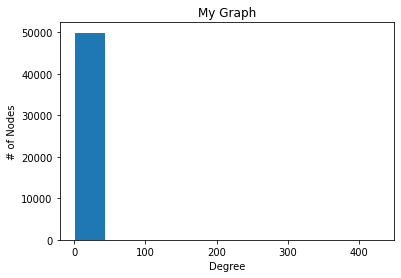

Graph with 50000 nodes and 99468 edges
Diameter: 9
Average clustering: 0.084127


In [12]:
plt.hist(list(dict(g.degree()).values()))
plt.title("My Graph")
plt.xlabel('Degree')
plt.ylabel('# of Nodes')
plt.show()

print(g)
print("Diameter:", diam)
print("Average clustering:", avg_clust)

# Problem 3.

Given _G_ a graph and _k_ the number of maximum users I can follow, to maximize the number of users that I know what they post, assuming I have complete knowledge of the network, I can use this type of algorithm:

```python
g <- a copy of G

results = [] # an empty list of results
nodes_reached = [] # list of the nodes we can have access to

while len(results) < k:
    
    nodes: "a sorted list of the nodes of g"
    
    candidates = [something] # a list of candidates nodes (a candidate node is a node that has the
                             # same degree of the node with the highest degree)
                
    gain_list = [] # a list that will contain the current gain in terms of nodes we can have access to
    
    for node in candidates:
        
        plus_list = [] # a current gain that has to be maximize
    
        if node not in nodes_reached:
            
            # Append the node to the plus_list because is a node of which we don't have access to
            
        for neighbor in Neighbors(node):
            
            if neighbor not in nodes_reached:
                
                # Append the node to the plus_list because is a node of which we don't have access to
                
        if # the current gain is bigger than the gain we had before:
            
            # we copy the plus_list into the gain_list
            
    # we remove the node that gives to us the maximum gain from g
    # we add the node to the results list
    # we add the new reached nodes to the nodes_reached list

return results

```

In [13]:
def maximize_users(g, k):

    # I take a copy of the graph g
    g = g.copy()
    
    results = []
    nodes_reached = []

    while len(results) < k:

        # I define a descending ordered list of the nodes of the graph g
        nodes = sorted(g.degree, key=lambda x: x[1], reverse=True)

        # I set a list of candidates and a threshold degree
        candidates = []
        degree = nodes[0][1]

        # I take as candidates all node that have the same degree of the current highest degree node
        for node in nodes:
            if node[1] == degree:
                candidates.append(node[0])

        # I have to initialize gain_list with the first candidate otherwise
        # I'll get an "index out of bound" error at "results.append(gain_list[0])"
        gain_list = [candidates[0]]

        # I want to find the candidate that gives me the best gain possible
        for node in candidates:
            
            if node == candidates[0]: continue
            
            # A list of the nodes this candidate gives me access to
            plus_list = []
            
            # If this node is a new node (never seen before) we add it in the plus_list
            if node not in nodes_reached:
                
                plus_list.append(node)

            # I do the same thing as before but for each neighbor of this current candidate
            for neighbor in g.neighbors(node):

                if neighbor not in nodes_reached:

                    plus_list.append(neighbor)

            # If the current candidate lets me reach more nodes that the previous one, I set it as
            # the current best
            if len(plus_list) > len(gain_list):
                
                gain_list = plus_list.copy()
        
        # I remove the best candidate node from the graph, add it in the results list and save
        # the new nodes reached in the nodes_reached list
        g.remove_node(gain_list[0])
        results.append(gain_list[0])
        nodes_reached += gain_list

    return results



In [14]:
k = 10
print("Using as graph \"facebook_combined\" and setting k =", k)
print("These are the users to follow to maximize our knoledge of users:", maximize_users(facebook_combined, k))

Using as graph "facebook_combined" and setting k = 10
These are the users to follow to maximize our knoledge of users: [107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]


# Problem 5.

### Installing needed libraries

In [20]:
!pip install torch==1.10.0+cu113 torchvision torchaudio torchtext -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch==1.10.0+cu113 torchvision torchaudio torchtext -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |██████████████▋                 | 834.1 MB 1.3 MB/s eta 0:12:57tcmalloc: large alloc 1147494400 bytes == 0x394fc000 @  0x7f0517c86615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |██████████████████▌             | 1055.7 MB 1.4 MB/s eta 0:08:52tcmalloc: large alloc 1434370048 bytes == 0x7db52000 @  0x7f0517c86615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |███████████████████████▌        | 1336.2 MB 1.6 MB/s eta 0:05:06tcmalloc: large alloc 1792966656 bytes =

## Importing libraries

In [21]:
import torch
import networkx as nx
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
import scipy
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from torch_geometric.data import Data
from torch_geometric.data import InMemoryDataset
from sklearn.model_selection import train_test_split
import torch_geometric.transforms as T

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

## Loading the graph

We have to load the dataset, which consists in two files:

- An edge list.
- A file with the labels.

Those file have being downloaded from the https://snap.stanford.edu/data/email-Eu-core.html page and saved in my personal google drive.

So to retrieve them we have to first mount the google drive and then load the edge list in a graph with "nx.read_edgelist()" and then read the file containing the labels and save it as an np.int64 list.

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
PATH =  "gdrive/MyDrive/hw1-social-network/" # path to the files

# load the graph
graph =  nx.read_edgelist(PATH+"email-Eu-core.txt", create_using=nx.Graph(), nodetype = int)

# retrieve label for each node
df_labels = pd.read_csv(PATH+"email-Eu-core-department-labels.txt", sep = ' ', header = None)
df_labels.columns = ['Node', 'Department']

labels = np.asarray(df_labels['Department'].tolist()).astype(np.int64)

## Embeddings

As embeddings I decided to use four possibilities:

- **Degree:** the number of connections each node has.
- **Betweenness centrality:** the amount of influence a node has over the flow of information in a graph.
- **Closeness centrality:** the average shortest distance from each vertex to each other vertex.
- **Eigenvector centrality:** the measure if the transitive influence of nodes, in other words the higher is the eigenvector centrality score the more the node is connected with high degree nodes.

For our purpose, we want to classify a node as belonging to a department, so the two measures that make more sense from the four we said before are the *degree* and the *eigenvector centrality*:

- **Degree:** people that are in the same department are more likely to be connected, so this means that they should have similar degree, in other words if a department _k_ is composed by _n_ people, the degree of those nodes/people is likely to be more or less equal to _n_.
- **Eigenvector centrality:** the reason is quite similar to the one we gave for the *degree*, people from the same department should be connected with each other this means that their eigenvector centrality should look similar.

We create a dictionary with all the embeddings in which the keys are the embeddings' name. As values of this dictionary we insert the scaled vector of the embedding. (The dimension of these vectors are all equal to the number of nodes, so 1005)

In [24]:
embeddings = {}
scale = StandardScaler()

# Degree
degree = np.array(list(dict(graph.degree()).values()))
embeddings['Degree'] = scale.fit_transform(degree.reshape(-1,1))

# Betweenness Centrality
bet = nx.betweenness_centrality(graph)
bet = np.array(list(bet.values()))
embeddings['Betweenness'] = scale.fit_transform(bet.reshape(-1,1))

# Close Centrality
close = nx.closeness_centrality(graph)
close = np.array(list(close.values()))
embeddings['Closeness'] = scale.fit_transform(close.reshape(-1,1))

# Eigen Centrality
eigen = nx.eigenvector_centrality(graph)
eigen = np.array(list(eigen.values()))
embeddings['Eigen'] = scale.fit_transform(eigen.reshape(-1,1))

## Our PyTorch Geometric Dataset

At this stage we have to define our dataset as a PyTorch Geometric dataset, to do so we define the class EmailEuCore which is a derivate of the InMemoryDataset (we used this this type of dataset because the graph has only 1005 nodes, so being a small graph we can save it in memory).

In this class we also split the data in three sets thanks to the train_test_split() function:
- **Training set:** The data we're going to use for training our model (70% of the entire dataset)
- **Validation set:** The data we're going to use for validate the model while it's training to tune the parameters (near 15% of the dataset).
- **Testing set:** The date on which we're going to validate the best model found (15% of the dataset). 

In this class there is also defined a function edge_index(), which is used to compute first the edge index by computing the adjacency matrix of the graph.

In [25]:
class EmailEuCore(InMemoryDataset):
  def __init__(self, transform = None, graph = None, embeddings = None, labels = None, seed = None):

    if not graph:
      raise Exception("You have to set a graph")

    if embeddings.all() == None:
      raise Exception("You have to set some embeddings")

    if labels.all() == None:
      raise Exception("You have to set the labels")

    if len(embeddings)!=len(labels)!=graph.number_of_nodes:
      raise Exception("Not corresponding demensions!")

    super(EmailEuCore, self).__init__(".", transform, None, None)

    data = Data(edge_index = self.edge_index())
    data.num_nodes = graph.number_of_nodes()

    # features vector
    data.x = torch.from_numpy(embeddings).type(torch.float32)

    # labels
    y = torch.from_numpy(labels).type(torch.long)
    data.y = y.clone().detach()

    data.num_classes = labels.max() + 1

    # Deviding the data set into 70% training, 15% validation and 15% testing

    X_train, X_test, y_train, y_test = train_test_split(pd.Series(graph.nodes()), pd.Series(labels),
                                                        test_size = 0.15, random_state = seed)
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                      test_size = 0.17, random_state = seed)
    
    # We set a mask for all sets
    train_mask = torch.zeros(data.num_nodes, dtype = torch.bool)
    test_mask = torch.zeros(data.num_nodes, dtype = torch.bool)
    val_mask = torch.zeros(data.num_nodes, dtype = torch.bool)
    train_mask[X_train.index] = True
    test_mask[X_test.index] = True
    val_mask[X_val.index] = True

    data["train_mask"] = train_mask
    data["test_mask"] = test_mask
    data["val_mask"] = val_mask

    self.data, self.slices = self.collate([data])

  def edge_index(self):
    # We need the adjacency matrix
    adj_matrix = nx.to_scipy_sparse_matrix(graph).tocoo()

    # Creating the index
    rows = torch.from_numpy(adj_matrix.row.astype(np.int64)).to(torch.long)
    cols = torch.from_numpy(adj_matrix.col.astype(np.int64)).to(torch.long)

    return torch.stack([rows, cols], dim=0)

## Define model

As model we used a Graph Convolutional Network with 3 hidden layers of 500, 250 and 100 neurons each.

As activation functions we've used RELU in the hidden layers and softmax for the output.

Because we're working with a convolutional neural network type we use batch normalization to avoid using dropout: dropout would make performance drop because convolutional neural networks have fewer parameters than in a conventional fully connected neural network.

In [26]:
class Net(torch.nn.Module):
  def __init__(self, data = None):
    
    if not data:
      raise Exception("You have to pass a data")

    super(Net, self).__init__()
    self.conv1 = GCNConv(data.num_features, 500)
    self.bn1 = torch.nn.BatchNorm1d(500)
    self.conv2 = GCNConv(500, 250)
    self.bn2 = torch.nn.BatchNorm1d(250)
    self.conv3 = GCNConv(250, 100)
    self.bn3 = torch.nn.BatchNorm1d(100)
    self.conv4 = GCNConv(100, int(data.num_classes))
  
  def forward(self, data):
    x, edge_index = data.x, data.edge_index
    x = F.relu(self.bn1(self.conv1(x, edge_index)))
    x = F.relu(self.bn2(self.conv2(x, edge_index)))
    x = F.relu(self.bn3(self.conv3(x, edge_index)))
    x = self.conv4(x, edge_index)
    return F.log_softmax(x, dim=1)

## Training and testing functions

Here we define three functions:
- **train():** where we set the model in training by calling model.train(), clear the gradient with "optimizer.zero_grad()", calculate the *negative log likelihood* and backpropagate the result with "F.nll_loss(model(data)[data.train_mask], data.y[data.train_mask]).backward()" and we update the weights with "optimizer.step()".
- **test():** where we set the model into evaluation mode with "model.eval()" and get the prediction on the test set data.
- **validation():** same of the test function but with the validation set data, but we return the f1-score.

In [27]:
def train(model, optimizer, data):

  model.train()
  optimizer.zero_grad()

  F.nll_loss(model(data)[data.train_mask], data.y[data.train_mask]).backward() 
  optimizer.step()

@torch.no_grad()
def test(model, data):

  model.eval()
  logits = model(data)
  
  test_mask = data['test_mask']
  test_pred = logits[test_mask].max(1)[1]

  return data.y[test_mask].cpu(), test_pred.cpu()


@torch.no_grad()
def validation(model, data):

  model.eval()
  logits = model(data)
  
  val_mask = data['val_mask']
  val_pred = logits[val_mask].max(1)[1]

  precision = precision_score(data.y[val_mask].cpu(), val_pred.cpu(), average='weighted', zero_division = 0)
  recall = recall_score(data.y[val_mask].cpu(), val_pred.cpu(), average='weighted', zero_division = 0)

  return (2*precision*recall)/(precision+recall)

## Training and testing

Here we do the real training of the model.

There is a main loop over all the embeddings we have defined previously, nested with a secondary loop in which we train the model and evaluate it measuring the f1 score and compare it with the maximum value we got so far: if the current model has a better f1 score on the validation set we update the maximum of the f1 score with the current model f1 score and save the model with "torch.save(model.state_dict(), path)".
The main loop continues with the testing section where we load the best model found and test it on the test set data.

In the end we print accuracy, precision, recall and f1-score of the best model and we output also the confusion matrix.

Degree

Confusion Matrix


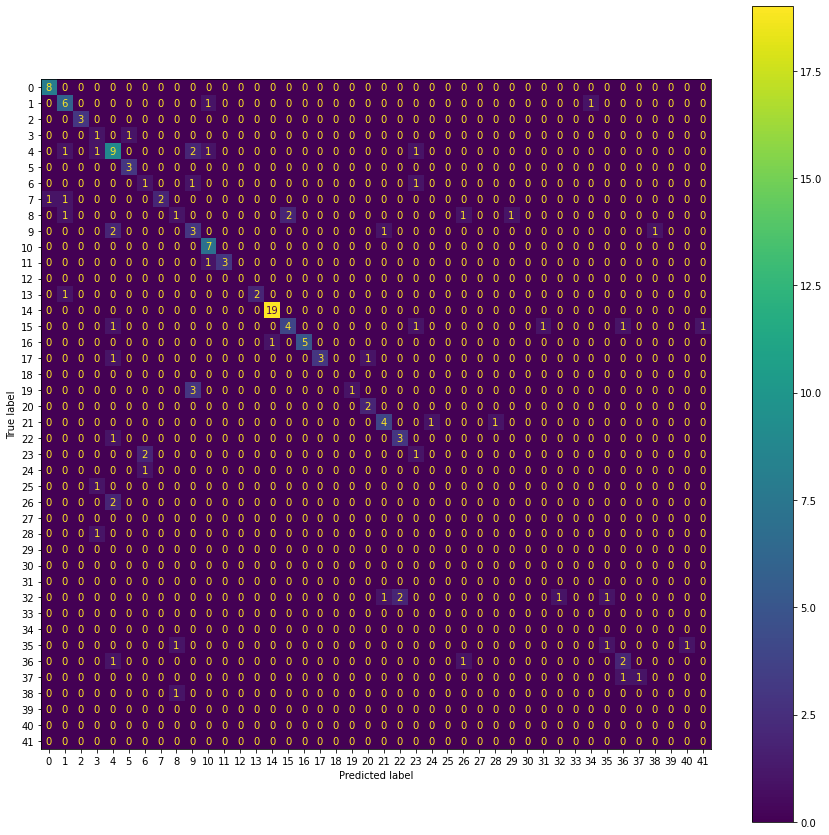


Metrics over testing:
  Type  Accuracy  Precision   Recall  F1-Score
Degree  0.635762   0.692841 0.635762  0.663075

######################################################################


Betweenness

Confusion Matrix


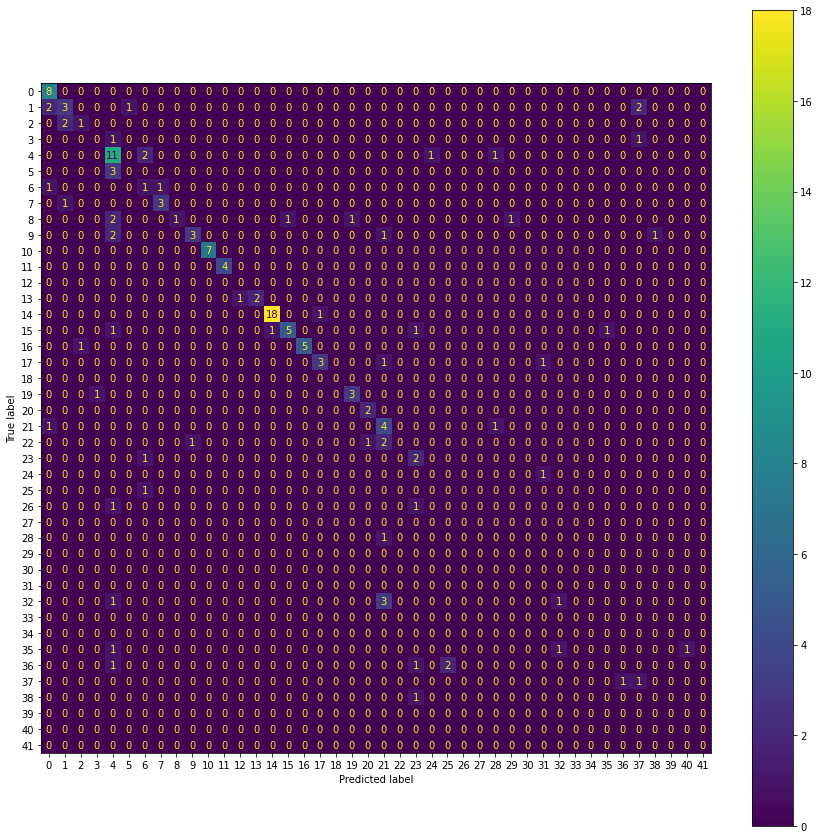


Metrics over testing:
       Type  Accuracy  Precision   Recall  F1-Score
Betweenness  0.582781    0.61021 0.582781   0.59618

######################################################################


Closeness

Confusion Matrix


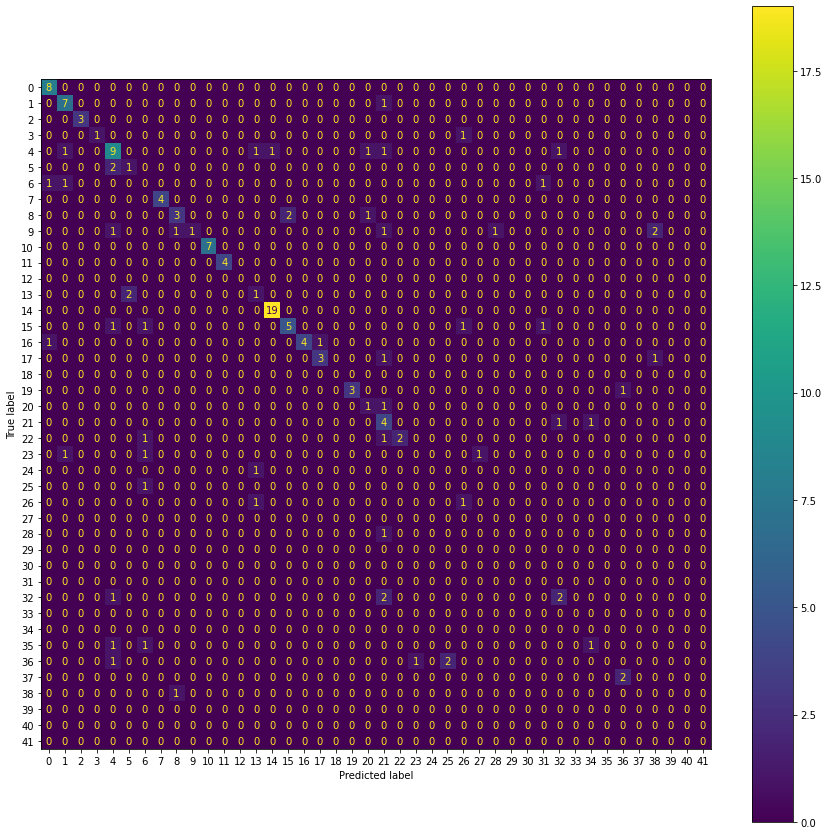


Metrics over testing:
     Type  Accuracy  Precision   Recall  F1-Score
Closeness  0.615894   0.666858 0.615894  0.640364

######################################################################


Eigen

Confusion Matrix


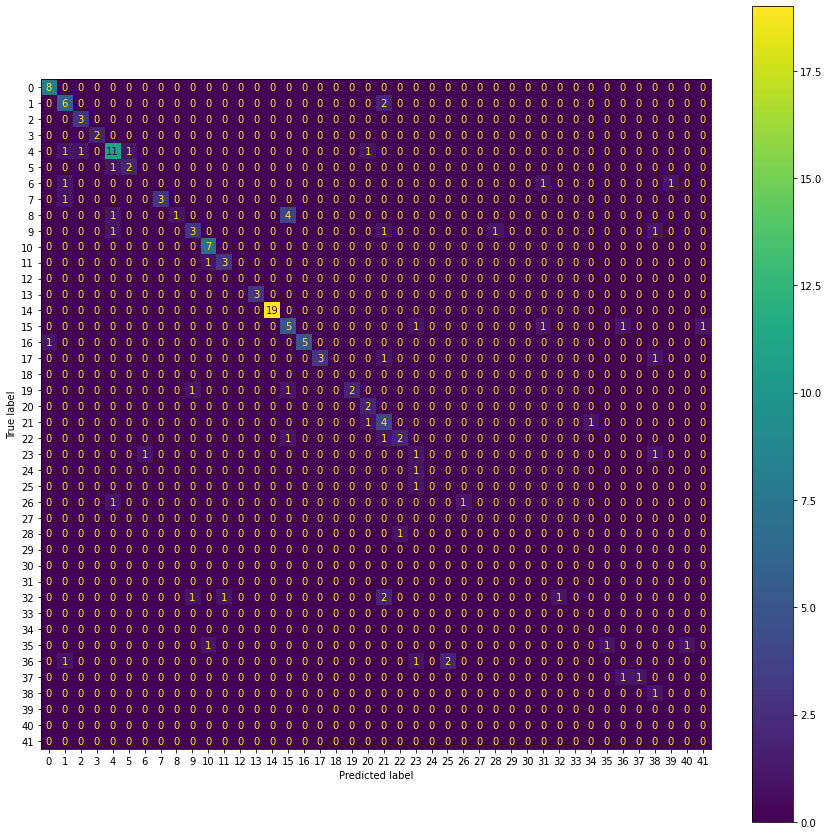


Metrics over testing:
 Type  Accuracy  Precision   Recall  F1-Score
Eigen  0.662252   0.739039 0.662252  0.698542

######################################################################


Metrics over testing
       Type  Accuracy  Precision   Recall  F1-Score
     Degree  0.635762   0.692841 0.635762  0.663075
Betweenness  0.582781   0.610210 0.582781  0.596180
  Closeness  0.615894   0.666858 0.615894  0.640364
      Eigen  0.662252   0.739039 0.662252  0.698542

######################################################################


In [36]:
seed = 1234
epochs = 20000
training = False

lr = 1e-1
torch.manual_seed(seed)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

test_metrics = pd.DataFrame(columns = ['Type', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

PATH =  "gdrive/MyDrive/hw1-social-network/" # path where to save the model

cm_labels = []

for label in labels:
  if label not in cm_labels:
    cm_labels.append(label)
cm_labels.sort()

for embedding in embeddings:

  print(embedding)

  # Preparing the dataset
  dataset = EmailEuCore(graph = graph, embeddings = embeddings[embedding], labels = labels, seed = seed)
  data = dataset[0]

  best_epoch = 0

  data =  data.to(device)
  model = Net(data).to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  max_f1_score = 0

  if training:

    # Train the model on the train set
    for epoch in tqdm(range(1, epochs+1)):

      # training of the model
      train(model = model, optimizer = optimizer, data = data)

      # Validation of the model on the validation set
      val_f1 = validation(model = model, data = data)

      # Checking if the current f1 score is better than the maximum we have
      if max_f1_score < val_f1:

        best_epoch = epoch
        max_f1_score = val_f1

        # Saving the best model
        torch.save(model.state_dict(), PATH+embedding+'-GCN-model.pth')

  # Load the best model according to f1_score
  model.load_state_dict(torch.load(PATH+embedding+'-GCN-model.pth', map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu') ))

  # Eval the model on the test set
  test_true, test_pred = test(model = model, data = data)

  test_precision = precision_score(test_true, test_pred, average='weighted', zero_division = 0)
  test_recall = recall_score(test_true, test_pred, average='weighted', zero_division = 0)

  # Saving the test metrics in a dataframe
  current_test_metric =  pd.DataFrame([[embedding, accuracy_score(test_true, test_pred),
                                   test_precision, test_recall, (2*test_precision*test_recall)/(test_precision+test_recall)]],
                                 columns = ['Type', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

  # Printing the confusion matrix
  print()
  print("Confusion Matrix")
  fig, ax = plt.subplots(figsize=(15, 15))
  ConfusionMatrixDisplay.from_predictions(test_true, test_pred, labels = cm_labels, ax=ax)
  plt.show()
  print()
  if training:
    print("Best epoch:", best_epoch)
    print("F1-score in validation:", max_f1_score)
  print("Metrics over testing:")
  print(current_test_metric.to_string(index = False))

  test_metrics = pd.concat([test_metrics, current_test_metric])

  print()
  print('#' * 70)
  print()
  print()

# Printing the tables with all the metrics
print("Metrics over testing")
print(test_metrics.to_string(index = False))
print()
print('#' * 70)

## Results

As we can see the best results come from the two expected embeddings (**degree** and **eigenvector centrality**), but even **closeness centrality** and **betweenness centrality** give us metrics above 0.5.
We can see from the confusion matrix that the model is hable to classify pretty accurately the nodes/people that comes from the more popular departments (14, 4, 1...), but misses on classifing the ones with smaller number of members.

I think that the solution to over come this problem would be to have more data about the smaller departments.

# Bonus - Comparing different models

## Importing additional libraries

In [29]:
from sklearn.neighbors import KNeighborsClassifier

## Training the knn

We used as a different type of model a KNN-classifier: the reason behind this choice is that for this problem we want to indentify nodes that are in the same clusters, so a KNN-classifier, that is able to indentify the classes of nearby nodes, should work for this.

We used the average degree of the nodes as the number of neighbors to look at for the KNN algorithm. 

Degree

Confusion Matrix


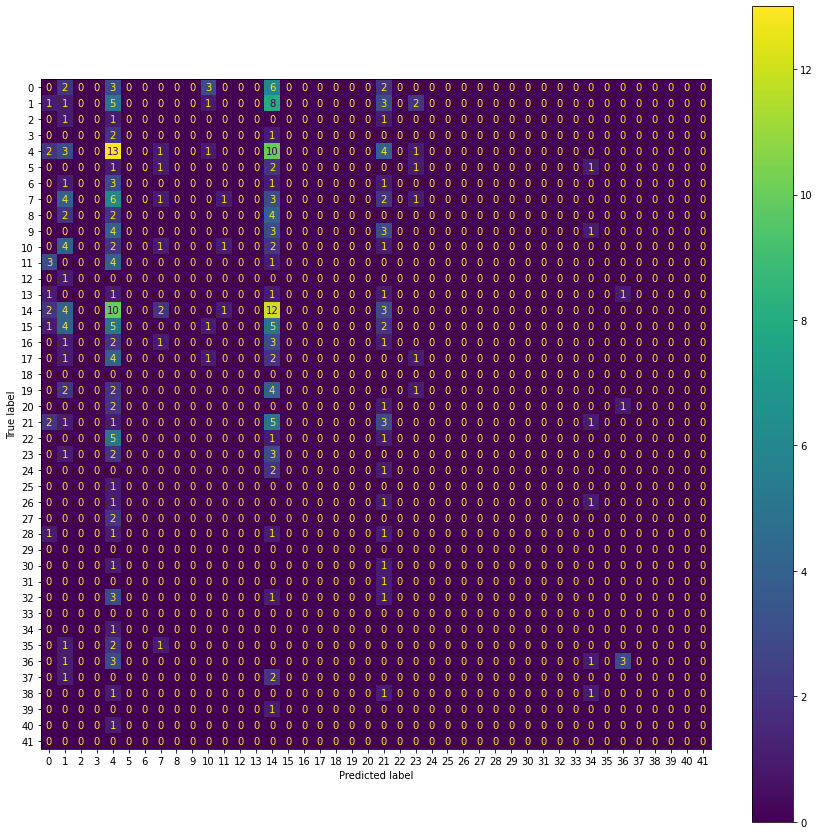


  Type  Accuracy  Precision   Recall  F1-Score
Degree  0.109272   0.060479 0.109272  0.077863

######################################################################


Betweenness

Confusion Matrix


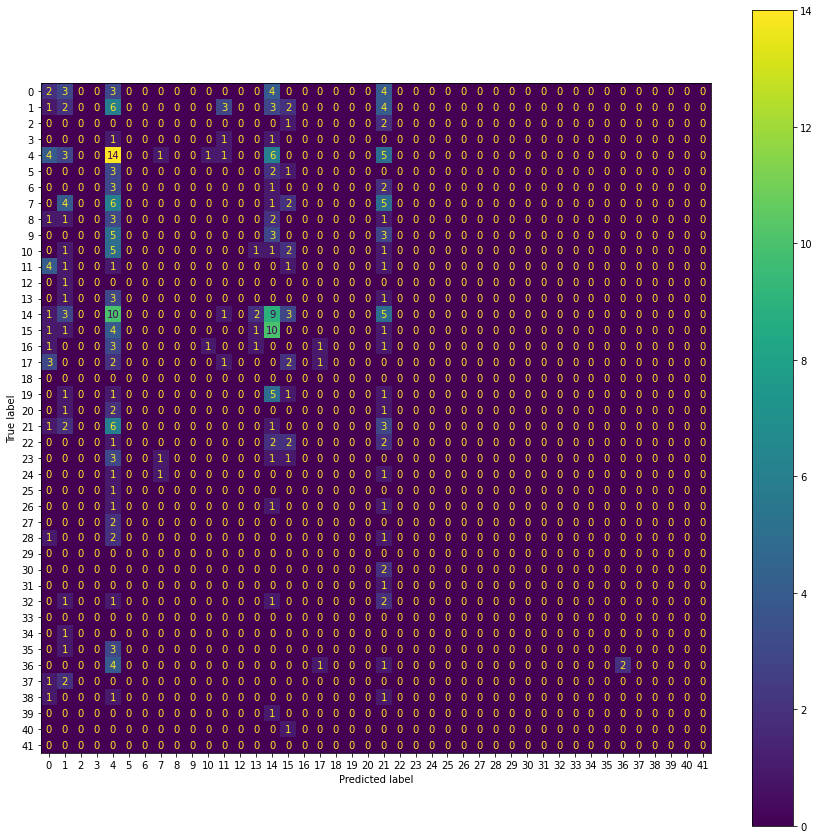


       Type  Accuracy  Precision   Recall  F1-Score
Betweenness  0.109272     0.0828 0.109272  0.094211

######################################################################


Closeness

Confusion Matrix


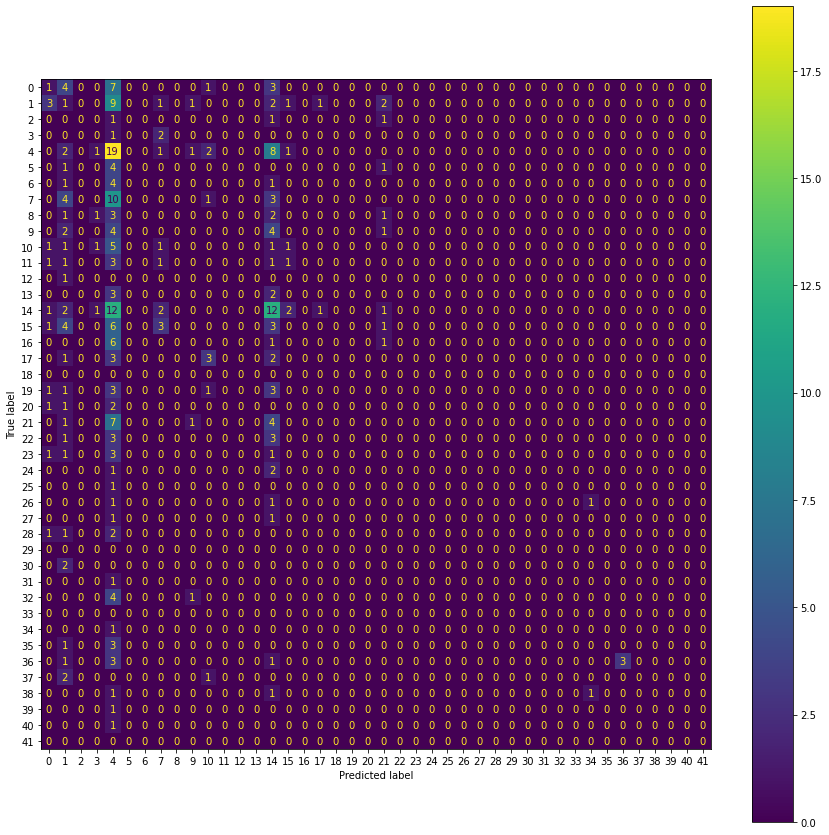


     Type  Accuracy  Precision   Recall  F1-Score
Closeness  0.119205   0.070021 0.119205  0.088221

######################################################################


Eigen

Confusion Matrix


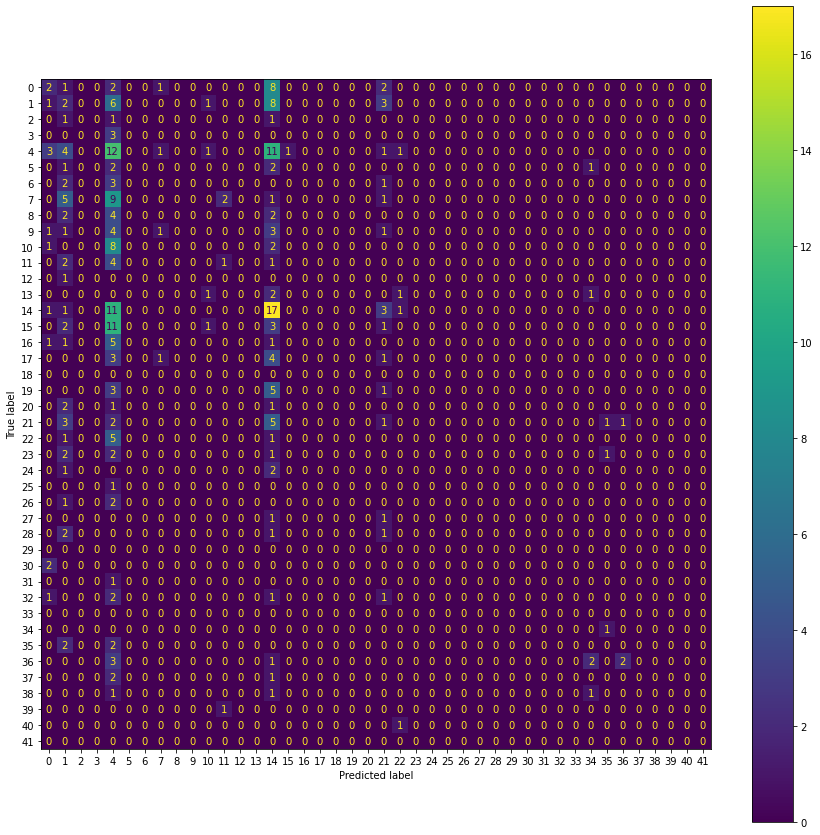


 Type  Accuracy  Precision   Recall  F1-Score
Eigen  0.122517   0.072268 0.122517  0.090911

######################################################################


Metrics over testing for knn
       Type  Accuracy  Precision   Recall  F1-Score
     Degree  0.109272   0.060479 0.109272  0.077863
Betweenness  0.109272   0.082800 0.109272  0.094211
  Closeness  0.119205   0.070021 0.119205  0.088221
      Eigen  0.122517   0.072268 0.122517  0.090911

######################################################################


In [37]:
seed = 1234

knn_test_metrics = pd.DataFrame(columns = ['Type', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

for embedding in embeddings:

  print(embedding)

  X_train, X_test, y_train, y_test = train_test_split(embeddings[embedding], labels,
                                                      test_size = 0.3, random_state = seed)
  
  knn = KNeighborsClassifier(n_neighbors = int(np.sum(list(dict(graph.degree()).values()))/graph.number_of_nodes()))

  knn.fit(X_train,y_train)
  pred = knn.predict(X_test)

  test_precision = precision_score(y_test, pred, average='weighted', zero_division = 0)
  test_recall = recall_score(y_test, pred, average='weighted', zero_division = 0) 

  current_knn_test_metric =  pd.DataFrame([[embedding, accuracy_score(y_test, pred),
                                        test_precision, test_recall, (2*test_precision*test_recall)/(test_precision+test_recall)]],
                                      columns = ['Type', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
  
  print()
  print("Confusion Matrix")
  fig, ax = plt.subplots(figsize=(15, 15))
  ConfusionMatrixDisplay.from_predictions(y_test, pred, labels = cm_labels, ax=ax)
  plt.show()
  print()
  print(current_knn_test_metric.to_string(index = False))

  knn_test_metrics = pd.concat([knn_test_metrics, current_knn_test_metric])
  print()
  print('#' * 70)
  print()
  print()


# Printing the tables with all the metrics
print("Metrics over testing for knn")
print(knn_test_metrics.to_string(index = False))
print()
print('#' * 70)

## Results

As we can see the KNN-classifier is not able to reproduce the same metrics' values of the GCN, this should be caused by the complexity of the data structure (nodes sometimes are connected with other nodes that are not so close), that makes this type of algorithm not good for this task.